# Probabilities

## Objective vs Subjective

- Objective Probabilities
  - Based on statistics, experiments and mathematical measurements
    - **Classical Probability**, based on formal reasoning
      - e.g. flipping a coin
    - **Empirical Probability**, based on experimental or historical data
      - e.g. predicting weather tomorrow
      - used in Inferential Statistics  
- Subjective Probabilities
  - Based on personal feeling or judgement

## Events

### Mutually Exclusive

- <big>Two events are "Mutually Exclusive" if they **cannot happen at the same time**</big>
  - E.g. Rain vs No Rain
- <mark>Addition Rules</mark>
  - For two mutually exclusive events, `P(A or B) = P(A) + P(B)`


### Independent 

- <big>Two event are independent if the **occurrence of one does not change the probability of the other event**</big>
  - I.E. one event does not affect the outcome of the other event
- <mark>Multiplication Rule</mark>
  - For two independent events, `P(A and B) = P(A) * P(B)`

### Dependent

- <big>Two events are dependent if the **outcome of one does affect the other**</big>
- <mark>Rule</mark>
  - Probability of A happening and B hapeening:
    - `P(A and B) = P(A) * P(B | A)`
    -  "Probability of A happening", times "Probability of B happening given A has happened"
  - (move the equations to get Conditional Probabilities)


## Conditional Probabilities

- `P(B | A) = P(A and B) / P(A)`
  - Probability of B happening given A has happened
    - Probabilty of A and B both happening, divided by Probability of A happening
- <big><font color='crimson'> Using Conditional Probabilities in Business Context</font></big>
  - <mark>TODO: Rephrase the business questions as a conditional probability question?</mark>
  - Given a user has enrolled, what is the probability that user will get started on a course?
  - Given an user has completed N lessons, probability of that user will be retained in the following month?
  - ...?


### Bayes Theorem (or Bayes Rule)

- `P(A | B) = P(B | A) * P(A)`, divided by `P(B)`
  - Posterior Probability `P(A | B)`
    - Probability of A happening given B has already happened
    - Updated Probability with the new Data
  - Prior Probability `P(A)`
    - Probability before new Data is collected
  - Likelihood `P(B)`
- Bayesian Statistics, or Bayesian Inference

### Expanded Bayes Theorem

- `P(A | B) = P(B | A) * P(A)`, divided by `P(B | A) * P(A) + P(B | not A) * P(not A)`
  - Useful when `P(B)` is not available
- <font color='crimson'>TODO: A good challenge is how to apply the business questions you encountered with Conditional Probabilities</font

## Probability Distributions

- With Probabilities, the challenging thing is <big>interpreting business questions into a probability-based question</big>
  - Or, Conditional Probability-based

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

sns.set()

### Discrete & Continuous - Uniform Distribution

- <big>Reprents events with equal probabilities</big>

In [6]:
rng = np.random.default_rng()

In [7]:
interval_lower_bound = 0.0
interval_upper_bound = 3.0
rng.uniform(interval_lower_bound, interval_upper_bound, 10)
# drawn from continuous uniform distribution, 10 draws
# with lower bound at 0.0 and upper bound at 3.0

array([0.70285462, 2.37334558, 0.30717707, 1.04740693, 0.93429228,
       0.50550521, 0.70024957, 0.10958428, 2.59908823, 0.17778929])

In [8]:
rng.integers(1, 6, 10)
# drawn from discrete uniform distribution, 10 draws
# similar to roll a fair die 10 times

array([2, 1, 2, 5, 1, 2, 4, 5, 5, 4])

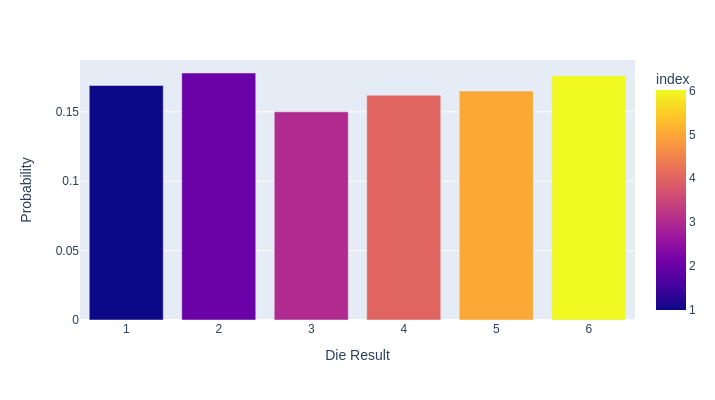

In [10]:
draws = rng.integers(1, 7, 1000)
tmp = pd.Series(draws).value_counts(normalize=True).to_frame() # ratio of each sde

fig = px.bar(tmp, color=tmp.index, height=400)
fig.update_layout(xaxis_title="Die Result", yaxis_title="Probability")
fig.show()

In [ ]:
# TODO: plot continuous variable application 

### Discrete - Bernoulli Distribution

- <big>Represents **single Bernoulli trial's two possible outcomes: success or trial**</big>



### Discrete - Binomial Distribution

- <big>Represents experiments with **multiple independent Bernoulli trials and their two possible outcomes**</big>
- https://en.wikipedia.org/wiki/Binomial_distribution
- TODO: Rephrase business questions with only two outcomes as binomial distribution?
  - Given the exact probability of an event happening
    - To find the probability of the event happening a certain number of times in a repeated trial

In [43]:
rng = np.random.default_rng()

In [44]:
n_trials = 1000
success_probability = .5
sample_size = 10
np.random.binomial(n=n_trials, p=success_probability, size=sample_size)
# each sample has 1000 trials, the success probability is 50%
# return a list of samples, each is the number of success trials for a sample

array([524, 475, 480, 484, 474, 529, 505, 519, 484, 503])

### Discrete - Poisson Distribution

- <big>Represents **a certain number of events will occur during a specific time period**</big>
    - Or during a specific space (distance, area, volume ...etc)
- Pre-requirements
    - **Countable number of events (I.e Discrete Events)**
    - **Known value of "mean number of events that occurred during a specific timer period"**
    - **Each event is independent**
- E.g.
  - For a delivery service, number of orders received in a given 30 minutes periods
  - Given the average probability of an event happening for a specific time period
   - To find the probability of a certain number of events happening in the time period
- https://www.coursera.org/learn/the-power-of-statistics/supplement/4RNyV/discrete-probability-distributions

### Continuous - Normal Distribution

- Normal Distribution
- Z-Score, or "Standard Score"
  - Measure of how many standard deviations below or above the population mean a data point is
  - ==0, means the value equals to the population mean
  - Z = (x - population mean) / (population standard deviation)
  - Help in standardizing the data
  - Based on Standard Normal Distribution, i.e. normal distribution with mean=0 and std=1
  - NOTE: standardization to allow comparing values from different data distributions
    - E.g. with the Weekly Briefing content position problem,
      - it's actually about "standardizing" the click rates of each position

## Identify Data's Probability Distribution

- Normal Distribution
  1. **Plot the data with Histogram for initial exploration**
  2. If appears somewhat normal
     - Get mean and standard deviation of data
     - Get Percentage of data within 1, 2 and 3 Standard Deviation
     - **Compare the result with known Normal Distribution Properties**
- Properties
  - 68% of data within 1 Standard Deviation
  - 95% of data within 1 Standard Deviation
  - 99.7% of data within 1 Standard Deviation

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
df = pd.read_csv("./examples/modified_c4_epa_air_quality.csv")
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


> Is `aqi_log` normally distributed?

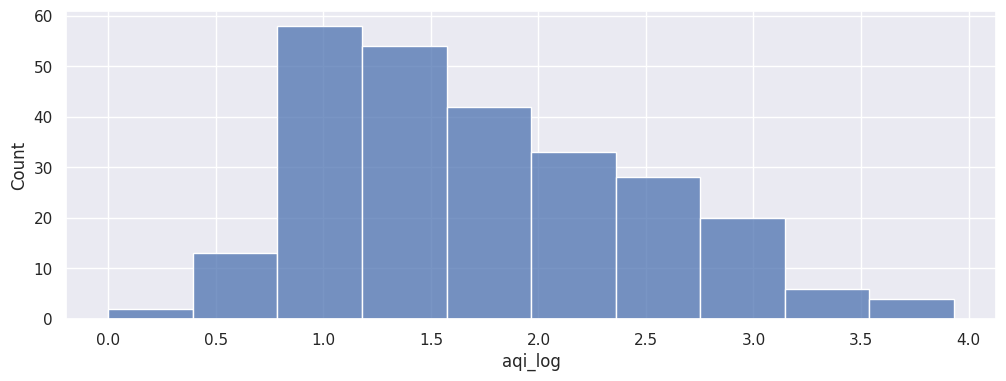

In [41]:
data = df.aqi_log
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data, bins=10, ax=ax)
fig.show()
# somewhat normal, but not very close

In [42]:
mean = data.mean() 
std = data.std()
data.shape, mean, std

((260,), 1.7669210929985582, 0.7147155520223721)

In [34]:
# ratio of data within 1 std
tmp = data[(data >= (mean - std)) & (data <= (mean + std))]
tmp.shape[0] / data.shape[0]
# 76% within 1 std

0.7615384615384615

In [46]:
# ratio of data within 2 std
tmp = data[(data >= (mean - 2*std)) & (data <= (mean + 2*std))]
tmp.shape[0] / data.shape[0]
# 95.7% within 2 std

0.9576923076923077

In [45]:
# ratio of data within 3 std
tmp = data[(data >= (mean - 3*std)) & (data <= (mean + 3*std))]
tmp.shape[0] / data.shape[0]
# 99.6% within 3 std

0.9961538461538462

- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

> Outlier detection with Z-score

- Since data is normally distributed, we can apply it to `aqi_log`


In [47]:
from scipy import stats

In [52]:
scores = stats.zscore(data)
df = df.assign(
    z_score=lambda d: stats.zscore(d.aqi_log)
)
df.shape

(260, 10)

In [53]:
df[(df["z_score"] > 3) | (df["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_scores,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886,3.034886


- The aqi_log for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.